In [1]:
##IMPORTING ESSENTIAL LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
%matplotlib inline


In [2]:
#IMPORTING THE DATASET 
df_train = pd.read_csv('train_staff.csv')
df_test = pd.read_csv('test_staff.csv')


# DATA EXPLORATION


In [3]:
df_train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [4]:
df_test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [6]:
df_train.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [7]:
df_test.describe()

,Emp_ID
count,741.000000
mean,1361.460189
std,808.745019
min,2.000000
25%,624.000000
50%,1316.000000
75%,2078.000000
max,2788.000000


In [8]:
#MISSING VALUE PERCENTAGE

percent_missing = df_train.isnull().sum()*100/len(df_train)
percent_missing

MMM-YY                   0.000000
Emp_ID                   0.000000
Age                      0.000000
Gender                   0.000000
City                     0.000000
Education_Level          0.000000
Salary                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Designation              0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

NO MISSING VALUES FOUND EXCEPT THE COLUMN 'LastWorkingDate' WHICH IS HAVING 91.54% MISSING VALUES.
THIS COLUMN CAN BE DROPPED AS NO. OF MONTHS THE EMPLOYEE HAS WORKED CAN BE FOUND OUT BY 'MMM-YY' COLUMN.
THE MONTH IN WHICH THE EMPLOYEE REPORTED LASTLY WOULD BE HIS/HER LAST WORKING MONTH

In [9]:
df_train['Education_Level'].unique()

array(['Master', 'College', 'Bachelor'], dtype=object)

In [10]:
df_train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
df_train['City'].unique()

array(['C23', 'C7', 'C13', 'C9', 'C11', 'C2', 'C19', 'C26', 'C20', 'C17',
       'C29', 'C10', 'C24', 'C14', 'C6', 'C28', 'C5', 'C18', 'C27', 'C15',
       'C8', 'C25', 'C21', 'C1', 'C4', 'C3', 'C16', 'C22', 'C12'],
      dtype=object)

THERE ARE 3 CATEGORICAL VARIABLES , NAMELY City,Gender & Education_Level.
THESE CATEGORICAL VARIABLES HAVE VERY LESS CATEGORIES THUS CAN BE LABEL ENCODED TO BE DEALT WITH

# DATA PREPROCESSING  AND FEATURE ELIMINATION


 DROPPING THE COLUMN 'LastWorkingDate'

In [12]:
df_train.drop(['LastWorkingDate'],axis = 1, inplace = True)

In [13]:
df_train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,2,2,0,1


LABEL ENCODING THE CATEGORICAL VARIABLES Gender, City & Education_Level

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['Gender'] = le.fit_transform(df_train['Gender'])

In [15]:
le = LabelEncoder()
df_train['City'] = le.fit_transform(df_train['City'])

In [16]:
le = LabelEncoder()
df_train['Education_Level'] = le.fit_transform(df_train['Education_Level'])

In [17]:
df_train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,1,15,2,57387,2015-12-24,1,1,2381060,2
1,2016-02-01,1,28,1,15,2,57387,2015-12-24,1,1,-665480,2
2,2016-03-01,1,28,1,15,2,57387,2015-12-24,1,1,0,2
3,2017-11-01,2,31,1,26,2,67016,2017-11-06,2,2,0,1
4,2017-12-01,2,31,1,26,2,67016,2017-11-06,2,2,0,1


HANDLING THE DATETIME FEATURES

In [18]:
df_train['Reporting_Year'] = pd.to_datetime(df_train['MMM-YY']).dt.year
df_train['Reporting_Month'] = pd.to_datetime(df_train['MMM-YY']).dt.month
df_train['Reporting_day'] = pd.to_datetime(df_train['MMM-YY']).dt.day

In [19]:
df_train['Joining_Year'] = pd.to_datetime(df_train['Dateofjoining']).dt.year
df_train['Joining_Month'] = pd.to_datetime(df_train['Dateofjoining']).dt.month
df_train['Joining_day'] = pd.to_datetime(df_train['Dateofjoining']).dt.day

In [20]:
df_train.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating,Reporting_Year,Reporting_Month,Reporting_day,Joining_Year,Joining_Month,Joining_day
0,2016-01-01,1,28,1,15,2,57387,2015-12-24,1,1,2381060,2,2016,1,1,2015,12,24
1,2016-02-01,1,28,1,15,2,57387,2015-12-24,1,1,-665480,2,2016,2,1,2015,12,24
2,2016-03-01,1,28,1,15,2,57387,2015-12-24,1,1,0,2,2016,3,1,2015,12,24
3,2017-11-01,2,31,1,26,2,67016,2017-11-06,2,2,0,1,2017,11,1,2017,11,6
4,2017-12-01,2,31,1,26,2,67016,2017-11-06,2,2,0,1,2017,12,1,2017,11,6


In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  int32 
 4   City                  19104 non-null  int32 
 5   Education_Level       19104 non-null  int32 
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   Joining Designation   19104 non-null  int64 
 9   Designation           19104 non-null  int64 
 10  Total Business Value  19104 non-null  int64 
 11  Quarterly Rating      19104 non-null  int64 
 12  Reporting_Year        19104 non-null  int64 
 13  Reporting_Month       19104 non-null  int64 
 14  Reporting_day         19104 non-null  int64 
 15  Joining_Year          19104 non-null

NOW AS BOTH THE DATETIME FEATURES ARE BROKEN DOWN INTO dtype int
HENCE BOTH THE ORIGINAL DATETIME FEATURES CAN BE REMOVED

In [22]:
df_train.drop(['MMM-YY'],axis = 1, inplace = True)

In [23]:
df_train.drop(['Dateofjoining'],axis = 1, inplace = True)

In [24]:
df_train.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Reporting_Year,Reporting_Month,Reporting_day,Joining_Year,Joining_Month,Joining_day
0,1,28,1,15,2,57387,1,1,2381060,2,2016,1,1,2015,12,24
1,1,28,1,15,2,57387,1,1,-665480,2,2016,2,1,2015,12,24
2,1,28,1,15,2,57387,1,1,0,2,2016,3,1,2015,12,24
3,2,31,1,26,2,67016,2,2,0,1,2017,11,1,2017,11,6
4,2,31,1,26,2,67016,2,2,0,1,2017,12,1,2017,11,6


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Emp_ID                19104 non-null  int64
 1   Age                   19104 non-null  int64
 2   Gender                19104 non-null  int32
 3   City                  19104 non-null  int32
 4   Education_Level       19104 non-null  int32
 5   Salary                19104 non-null  int64
 6   Joining Designation   19104 non-null  int64
 7   Designation           19104 non-null  int64
 8   Total Business Value  19104 non-null  int64
 9   Quarterly Rating      19104 non-null  int64
 10  Reporting_Year        19104 non-null  int64
 11  Reporting_Month       19104 non-null  int64
 12  Reporting_day         19104 non-null  int64
 13  Joining_Year          19104 non-null  int64
 14  Joining_Month         19104 non-null  int64
 15  Joining_day           19104 non-null  int64
dtypes: i

CHECKING FOR CORRELATION STRENGTH BETWEEN THE FEATURES USING HEATMAP

<AxesSubplot:>

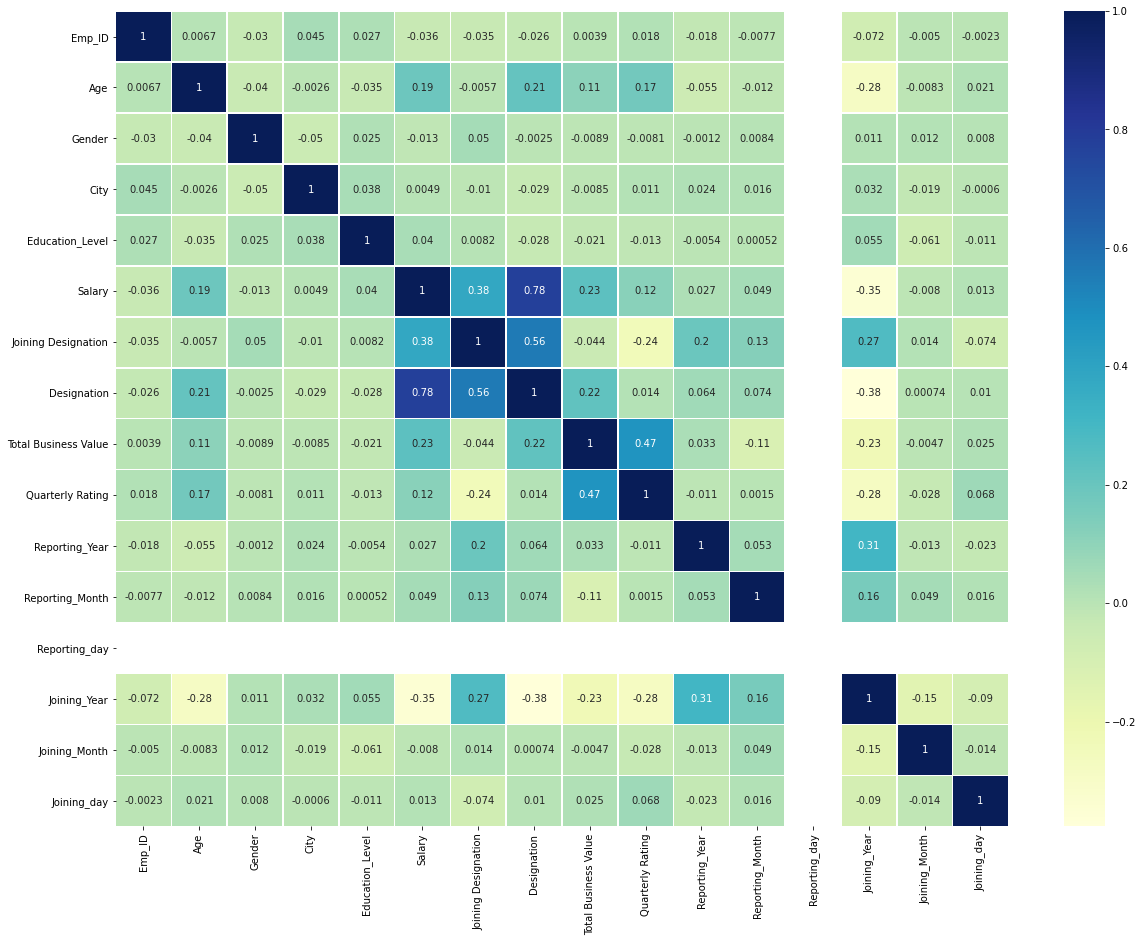

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(), cmap="YlGnBu", annot=True, linewidths=.5)

FROM THE ABOVE FIGURE IT IS EVIDENT THAT THERE IS STRONG CORRELATION BETWEEN THE FEATURE PAIRS
Designation-Salary, Designation-Joining Designation, Quarterly Rating-Total Business Value
AND THERE IS MODERATE CORRELATION BETWEEN THE FEATURE PAIRS 
Salary-joining_Designation, Age-Designation, Age-Salary  


NOW PLOTTING HISTOGRAMS FOR THE ABOVE FEATURE PAIRS FOR A MORE CLEAR VISUALISATION

HISTOGRAM Designation vs Salary

<AxesSubplot:xlabel='Designation', ylabel='Salary'>

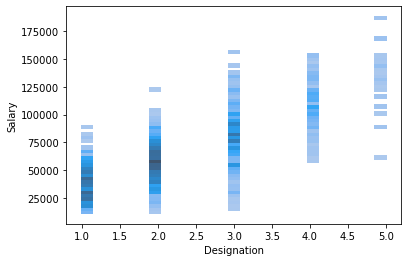

In [27]:
sns.histplot(data=df_train, x='Designation',y='Salary', kde=True)

HISTOGRAM Joining Designation vs Designation

<AxesSubplot:xlabel='Joining Designation', ylabel='Designation'>

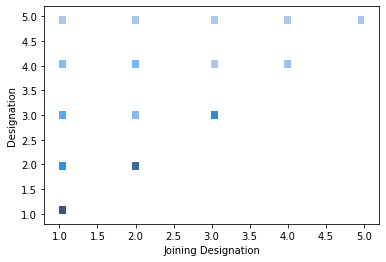

In [28]:
sns.histplot(data=df_train, x='Joining Designation',y='Designation', kde=True)

HISTOGRAM Quarterly Rating vs Total Business Value

<AxesSubplot:xlabel='Quarterly Rating', ylabel='Total Business Value'>

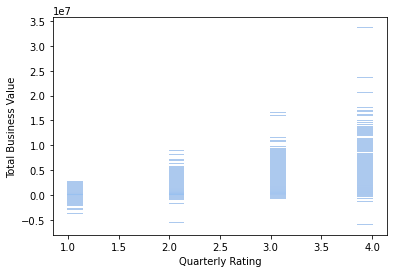

In [29]:
sns.histplot(data=df_train, x='Quarterly Rating',y='Total Business Value', kde=True)

HISTOGRAM joining_Designation vs Salary

<AxesSubplot:xlabel='Joining Designation', ylabel='Salary'>

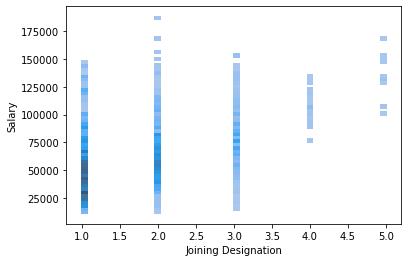

In [30]:
sns.histplot(data=df_train, x='Joining Designation',y='Salary', kde=True)

HISTOGRAM Age vs Designation 

<AxesSubplot:xlabel='Age', ylabel='Designation'>

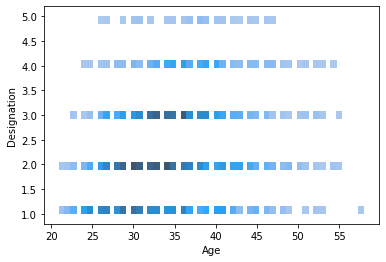

In [31]:
sns.histplot(data=df_train, x='Age',y='Designation', kde=True)

HISTOGRAM Age vs Salary 

<AxesSubplot:xlabel='Age', ylabel='Salary'>

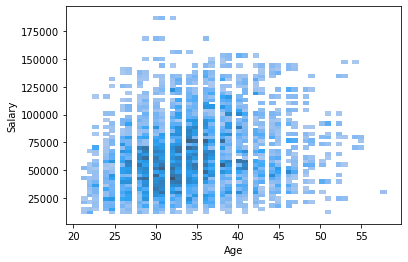

In [32]:
sns.histplot(data=df_train, x='Age',y='Salary', kde=True)

FROM ABOVE WE SEE THAT TWO FEATURES Salary and Designation ARE HIGHLY CORRELATED
HENCE TO AVOID THE CURSE OF DIMENTIONALITY WE REMOVE THESE TWO FEATURES FROM FURTHER ANALYSIS

In [33]:
df_train.drop(['Salary'],axis = 1, inplace = True)

In [34]:
df_train.drop(['Designation'],axis = 1, inplace = True)

In [35]:
df_train.head()

,Emp_ID,Age,Gender,City,Education_Level,Joining Designation,Total Business Value,Quarterly Rating,Reporting_Year,Reporting_Month,Reporting_day,Joining_Year,Joining_Month,Joining_day
0,1,28,1,15,2,1,2381060,2,2016,1,1,2015,12,24
1,1,28,1,15,2,1,-665480,2,2016,2,1,2015,12,24
2,1,28,1,15,2,1,0,2,2016,3,1,2015,12,24
3,2,31,1,26,2,2,0,1,2017,11,1,2017,11,6
4,2,31,1,26,2,2,0,1,2017,12,1,2017,11,6


# DATA ENGINEERING

WE NEED TO FIND OUT NOW EXACTLY FOR HOW MANY MONTHS AND DAYS DID AN EMPLOYEE WORKED IN THE COMPANY.
FOR THAT WE NEED NEW FEATURES 

In [36]:
df_train.describe()

,Emp_ID,Age,Gender,City,Education_Level,Joining Designation,Total Business Value,Quarterly Rating,Reporting_Year,Reporting_Month,Reporting_day,Joining_Year,Joining_Month,Joining_day
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000,19104.000000,19104.000000,19104.0,19104.000000,19104.000000,19104.000000
mean,1415.591133,34.650283,0.581187,14.117096,0.971891,1.690536,5.716621e+05,2.008899,2016.491834,6.422268,1.0,2014.776330,7.093645,16.059307
std,810.705321,6.264471,0.493378,8.272903,0.830500,0.836984,1.128312e+06,1.009832,0.499946,3.511325,0.0,1.920872,3.082911,9.219251
min,1.000000,21.000000,0.000000,0.000000,0.000000,1.000000,-6.000000e+06,1.000000,2016.000000,1.000000,1.0,2010.000000,1.000000,1.000000
25%,710.000000,30.000000,0.000000,7.000000,0.000000,1.000000,0.000000e+00,1.000000,2016.000000,3.000000,1.0,2013.000000,5.000000,8.000000
50%,1417.000000,34.000000,1.000000,14.000000,1.000000,1.000000,2.500000e+05,2.000000,2016.000000,6.000000,1.0,2015.000000,7.000000,16.000000
75%,2137.000000,39.000000,1.000000,21.000000,2.000000,2.000000,6.997000e+05,3.000000,2017.000000,9.000000,1.0,2016.000000,10.000000,24.000000
max,2788.000000,58.000000,1.000000,28.000000,2.000000,5.000000,3.374772e+07,4.000000,2017.000000,12.000000,1.0,2017.000000,12.000000,31.000000


FROM ABOVE WE CAN SEE THAT THE REPORTING DATE OF THE EMPLOYEE IS 1ST OF EVERY MONTH.
THUS Reporting_day AND Reporting_Month BOTH WILL ACCOUNT FOR A WHOLE SINGLE MONTH,
THUS WE STRIKE OUT THE FEATURE Reporting_day FROM OUR ANALYSIS AND TRY TO FOCUS ON 
THE NO. OF MONTHS THE EMPLOYEE WORKED IN THE COMPANY

In [37]:
df_train.drop(['Reporting_day'],axis = 1, inplace = True)

AGAIN, IRRESPECTIVE OF THE JOINING DATE, THE EMPLOYEE WILL REPORT AT 1ST OF EVERY MONTH.
SO WE CAN DROP THE FEATURE Joining_day FROM OUR ANALYSIS.
ALSO, REPORTING MONTH AND REPORTING YEAR ARE PROVIDED HENCE, EACH MONTH REPORTING HAS TO BE DONE
AND CORRESPONDINGLY WE CAN SRIKE OUT THE FEATURE Joining_Month FROM OUR ANALYSIS.
SAME GOES FOR THE FEATURE Joining_Year AS A DATE BEFORE 1ST OF ANY MONTH WOULD NOT BE COUNTED IN REPORTING.

In [38]:
df_train.drop(['Joining_day'],axis = 1, inplace = True)

In [39]:
df_train.drop(['Joining_Month'],axis = 1, inplace = True)

In [40]:
df_train.drop(['Joining_Year'],axis = 1, inplace = True)

In [41]:
df_train.head()

,Emp_ID,Age,Gender,City,Education_Level,Joining Designation,Total Business Value,Quarterly Rating,Reporting_Year,Reporting_Month
0,1,28,1,15,2,1,2381060,2,2016,1
1,1,28,1,15,2,1,-665480,2,2016,2
2,1,28,1,15,2,1,0,2,2016,3
3,2,31,1,26,2,2,0,1,2017,11
4,2,31,1,26,2,2,0,1,2017,12


NOW LETS FIND OUT THE NUMBER OF MONTHS EACH EMPLOYEE WORKED AFTER JOINING THE COMPANY

In [42]:
months_worked = df_train['Reporting_Month'].groupby(df_train['Emp_ID'])
months_worked.head().reset_index

<bound method Series.reset_index of 0         1
1         2
2         3
3        11
4        12
         ..
19097     6
19098     7
19099     8
19100     9
19101    10
Name: Reporting_Month, Length: 9801, dtype: int64>

In [43]:
months_worked.describe()

,count,mean,std,min,25%,50%,75%,max
Emp_ID,,,,,,,,
1,3.0,2.0,1.000000,1.0,1.50,2.0,2.50,3.0
2,2.0,11.5,0.707107,11.0,11.25,11.5,11.75,12.0
4,5.0,4.4,4.393177,1.0,2.00,3.0,4.00,12.0
5,3.0,2.0,1.000000,1.0,1.50,2.0,2.50,3.0
6,5.0,10.0,1.581139,8.0,9.00,10.0,11.00,12.0
...,...,...,...,...,...,...,...,...
2784,24.0,6.5,3.526299,1.0,3.75,6.5,9.25,12.0
2785,3.0,9.0,1.000000,8.0,8.50,9.0,9.50,10.0
2786,9.0,5.0,2.738613,1.0,3.00,5.0,7.00,9.0


NUMBER OF MONTHS WORKED BY AN EMPLOYEE CAN BE A USEFUL TOOL FOR THE COMPANY TO ASSESS
WHETHER AN EMPLOYEE IS A JOB HOPPER OR NOT

SPLITTING THE DATASET INTO TRAIN, VALIDATION AND TEST SET

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train,df_train['Emp_ID'],test_size = 0.25, random_state= 42)
from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(X_train,y_train,test_size = 0.2, random_state= 42)

FEATURE SCALING

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# MODEL TRAINING

# LOGISTIC REGRESSION

Training the Logistic Regression model on the Training set

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

E:\CONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

PREDICTING THE TEST SET RESULTS

In [47]:
y_pred = classifier.predict(X_test)


PERFORMANCE METRICS

In [48]:
from sklearn.metrics import f1_score
y_true = y_test
y_pred
f1_score(y_true, y_pred, average='macro')


0.44415524764375564

# DECISION TREE

Training the Decision Tree model on the Training set

In [49]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

PERFORMANCE METRICS

In [50]:
from sklearn.metrics import f1_score
y_true = y_test
y_pred
f1_score(y_true, y_pred, average='macro')


1.0

# RANDOM FOREST

Training the Random Forest model on the Training set

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

PERFORMANCE METRICS

In [52]:
from sklearn.metrics import f1_score
y_true = y_test
y_pred
f1_score(y_true, y_pred, average='macro')


1.0

# K-NEAREST NEIGHBOUR

Training the KNN model on the training set

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [54]:
from sklearn.metrics import f1_score
y_true = y_test
y_pred
f1_score(y_true, y_pred, average='macro')


1.0

# SUPPORT VECTOR MACHINES

Training the SVM model on the training set

In [55]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 
clf.fit(X_train, y_train)

SVC(kernel='linear')

PERFORMANCE METRICS

In [56]:
from sklearn.metrics import f1_score
y_true = y_test
y_pred
f1_score(y_true, y_pred, average='macro')


1.0

HENCE WE CAN SEE FROM HERE THAT ALL TREE BASED ALGORITHMS AS WELL AS OTHER SUPERVISED MACHINE LEARNING
ALGORITHMS TEND TO OVERFIT THE MODEL HENCE HYPERPARAMETER TUNING IS REQUIRED.
IN CASE OF LOGISTIC REGRESSION, THE RESULT CAN BE IMPROVED.

In [59]:
df_train.to_csv('STAFF_RETENTION_AV.csv',index=False)